# Projeto de Machine Learning

### Larissa Lewartoski Wong

# Identificação do problema e contextualização

Foi escolhido para esse projeto um dataset de domínio público, então não foi necessário realizar coleta dos dados.

## Dataset escolhido: Amazon Fine Food Reviews


#### O dataset está disponível em: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews/

![Dataset Escolhido](./imagens/dataset.png)

## Domínio do problema

O problema apresentado em questão envolve a análise de sentimentos para determinar a nota dada pelo cliente com base no conteúdo do review.

### Objetivo do trabalho

Este trabalho tem como objetivo principal o desenvolvimento e avaliação de um modelo de análise de sentimentos que possa analisar textos de avaliações e atribuir uma nota com base na polaridade dos sentimentos expressos no texto. Inicialmente será proposto e avaliado um modelo para determinar se a nota dada ao review foi 1 ou 5, com base nesse modelo inicial será possível avaliar se é viável expandir a determinação para todas as notas de 1 a 5.

# Aquisição e análise de dados

O conjunto de dados utilizado neste projeto foi obtido a partir do kaggle, não sendo necessária a realização do processo de coleta. A escolha do conjunto de dados se deu principalmente pelo interesse no processamento dos reviews. A princípio não houveram grandes dificuldades acerca do conjunto de dados. A maior dificuldade em relação ao projeto e ao conjunto de dados se deu em razão da necessidade de definir como seria separado o conjunto para aplicação de algoritmos. Em termos de documentação do dataset não houve nenhuma dificuldade no entendimento do que se tratavam os atributos e do que há no dataset.

## Definição do dataset

* O dados que integram o dataset são referentes a reviews realizados na plataforma Amazon, com foco nos reviews com tema comidas finas. O tema envolve comidas não necessariamente voltadas ao consumo humano e também é possível encontrar reviews de outras categorias no dataset. 
* Este dataset possui reviews realizados ao longo de mais de 10 anos com data final em outubro de 2012.
* Possui 9 atributos, desconsiderando o id.
* Possui 568,454 reviews
* Os atributos são de tipos variados, possuindo atributos numéricos e categóricos.

#### Em relação aos atributos:

Além da análise realizada por meio da documentação e observação do dataset foi realizada uma análise de tipos do dataset, localizada mais abaixo no documento.

- ProductId: código identificador único do produto (object, aparentemente strings com números e letras);
- UserId: código identificador único do usuário que fez o review (object, aparentemente strings com números e letras);
- ProfileName: nickname do usuário que fez o review (object, aparentemente strings com números e letras);
- HelpfulnessNumerator: número de usuários que marcaram o review como útil (número inteiro);
- HelpfulnessDenominator: número de usuários que marcaram o que acharam do review (sendo útil ou não) (número inteiro);
- Score: nota dada pelo usuário para o produto no review (número inteiro de 1 a 5);
- Time: timestamp de quando o review foi publicado (número inteiro);
- Summary: sumário do conteúdo do review (object, texto);
- Text: texto completo do review feito pelo usuário (object, texto).

## Análise exploratória dos dados

#### Import das bibliotecas utilizadas

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Carregamento do dataset

In [65]:
data = pd.read_csv('./amazon_fine_food_reviews/Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Verificando os tipos de dados

In [66]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

#### Verificando a existência de valores nulos

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [68]:
pd.options.mode.use_inf_as_na = True
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

#### Utilização do método describe para obter estatísticas descritivas para as variáveis numéricas

Com base no resultado obtido pelo método foi possível concluir que a maior parte dos reviews possui score entre 4 e 5 e que as marcações de outros usuários quanto à utilidade dos reviews é baixa .

In [69]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


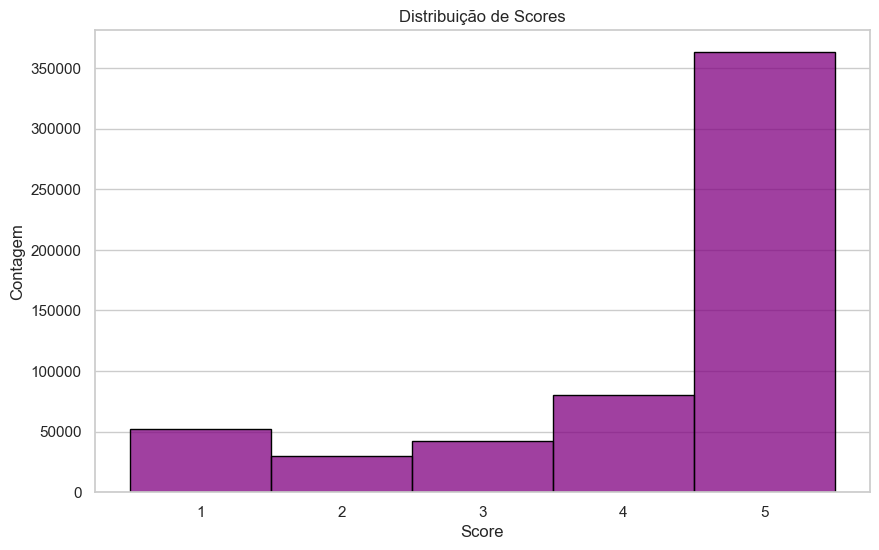

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações opcionais para tornar os gráficos mais atraentes
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Cria o histograma para a coluna 'Score' com bins centrados em 1, 2, 3, 4, 5
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

sns.histplot(data['Score'], bins=bins, kde=False, color='purple', edgecolor='black')

# Adiciona rótulos e título
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.title('Distribuição de Scores')

# Define os ticks do eixo x para representar as classificações
plt.xticks([1, 2, 3, 4, 5])

# Remove as linhas verticais do grid
ax = plt.gca()
ax.xaxis.grid(False)

# Exibe o histograma
plt.show()


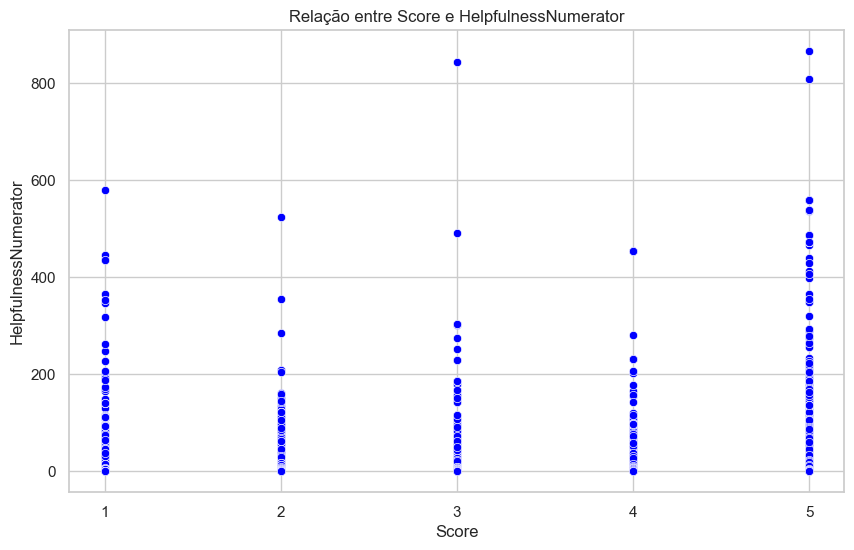

In [71]:
# Configurações opcionais para tornar os gráficos mais atraentes
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Cria o gráfico de dispersão entre 'Score' e 'HelpfulnessNumerator'
sns.scatterplot(x='Score', y='HelpfulnessNumerator', data=data, color='blue')

# Adiciona rótulos e título
plt.xlabel('Score')
plt.ylabel('HelpfulnessNumerator')
plt.title('Relação entre Score e HelpfulnessNumerator')

# Define os ticks do eixo x para representar apenas os valores desejados (1, 2, 3, 4, 5)
plt.xticks([1, 2, 3, 4, 5])

# Exibe o gráfico de dispersão
plt.show()

In [72]:
# Calcula o coeficiente de correlação de Pearson
correlation = np.corrcoef(data['HelpfulnessNumerator'], data['Score'])[0, 1]

print(f"Coeficiente de Correlação de Pearson: {correlation}")

Coeficiente de Correlação de Pearson: -0.032590113428634895


In [73]:
# Filtra o DataFrame original para incluir scores diferentes de 3
data_filter = data[data['Score'].isin([1, 2, 4, 5])].copy()

data_filter.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Observando a distribuição de classes 1 e 2 sendo considerados negativos e 4 e 5 sendo considerados positivos 

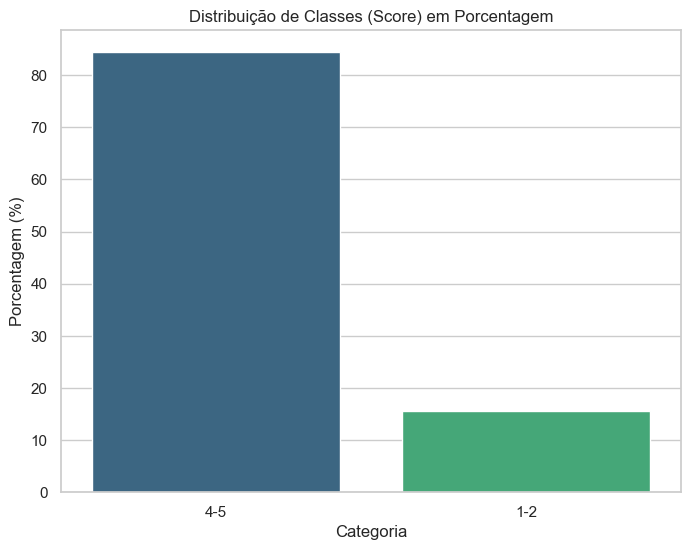

Distribuição de Classes (Score) em Porcentagem:
4-5    84.398095
1-2    15.601905
Name: Categoria, dtype: float64


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adiciona uma nova coluna chamada 'Categoria' com base nos scores
data_filter['Categoria'] = data_filter['Score'].map({1: '1-2', 2: '1-2', 4: '4-5', 5: '4-5'})

# Configurações opcionais para tornar os gráficos mais atraentes
sns.set(style="whitegrid")

# Calcula a porcentagem de cada categoria
porcentagens = data_filter['Categoria'].value_counts(normalize=True) * 100

# Gráfico de barras para a distribuição de classes em porcentagem
plt.figure(figsize=(8, 6))
sns.barplot(x=porcentagens.index, y=porcentagens, palette='viridis')
plt.xlabel('Categoria')
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição de Classes (Score) em Porcentagem')
plt.show()

# Imprime as porcentagens
print("Distribuição de Classes (Score) em Porcentagem:")
print(porcentagens)


# Pré processamento

### Transformando os scores em positivo e negativo, assim utilizando os scores como classe pois inicialmente não havia classe

- 0 é considerado negativo e 1 positivo

In [75]:
def partition(x):
    if x < 3:
        return 0
    return 1

score_upd = data_filter['Score']
t = score_upd.map(partition)
data_filter['Score']=t

In [76]:
data_filter.rename(columns={'Score': 'Class'}, inplace=True)

### Removendo linhas duplicadas e inconsistentes

- Linhas inconsistentes possuem o HelpfullnessNumerator maior do que o HelpfullnesDenominator

In [77]:
data_filter = data_filter.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

data_filter = data_filter[data_filter['HelpfulnessNumerator'] <= data_filter['HelpfulnessDenominator']]

### Adicionando a coluna Usefulness para separar reviews considerados úteis pelos usuários dos pouco úteis

- 0 é dado em que as opiniões positivas não deram mais de 50% de todas as opiniões do review, então considerado inútil
- 1 é considerado útil

In [78]:
data_filter["Usefulness"] = (data_filter["HelpfulnessNumerator"]/data_filter["HelpfulnessDenominator"]).apply(lambda n: 1 if n > 0.5 else 0)

# Remoção de colunas que não serão utilizadas

- main_data_only_ones possui o dataset sem as colunas que não serão utilizadas e apenas os scores 1 e 5
- main_data_combined possui o dataset sem as colunas que não serão utilizadas e apenas scores 1, 2 e 5

In [79]:
to_be_removed = ['Id', 'ProductId', 'UserId', 'ProfileName', 'Time', 'Summary', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Categoria']
# Remove as colunas
main_data = data_filter.drop(to_be_removed, axis=1)

In [80]:
count = main_data['Usefulness'].value_counts()
count_useful = count[1]

count_useless = count[0]
count_useless

print('Useful:', count_useful)
print('Useless:', count_useless)
print(count_useful+count_useless)

Useful: 151325
Useless: 212846
364171


#### Escolheu-se utilizar duas versões do dataframe: uma apenas com os reviews considerados úteis e uma com todos os reviews

In [81]:
main_data_total = main_data.copy()
main_data_useful = main_data[main_data['Usefulness'] != 0].copy()

main_data_total = main_data.iloc[0:3640, :].copy()
main_data_useful = main_data_useful.iloc[0:3640, :].copy()

In [82]:
main_data_total.count

<bound method DataFrame.count of       Class                                               Text  Usefulness
0         1  I have bought several of the Vitality canned d...           1
1         0  Product arrived labeled as Jumbo Salted Peanut...           0
2         1  This is a confection that has been around a fe...           1
3         0  If you are looking for the secret ingredient i...           1
4         1  Great taffy at a great price.  There was a wid...           0
...     ...                                                ...         ...
3962      1  High quality body wash that is very thick and ...           0
3963      1  I love this body wash.  It leaves my skin feel...           0
3964      1  Great product and great scheduled deliveries. ...           0
3965      1  Very pleased this stuff smells so good. My roo...           0
3966      1  i bought this -4 pack of dove deep wash and th...           0

[3640 rows x 3 columns]>

In [83]:
main_data_useful.count

<bound method DataFrame.count of        Class                                               Text  Usefulness
0          1  I have bought several of the Vitality canned d...           1
2          1  This is a confection that has been around a fe...           1
3          0  If you are looking for the secret ingredient i...           1
8          1  Right now I'm mostly just sprouting this so my...           1
10         1  I don't know if it's the cactus or the tequila...           1
...      ...                                                ...         ...
10519      0  This is for the Health Valley Tomato Soup No S...           1
10520      1  My husband had a stroke and needed no salt pro...           1
10521      1  I'm on a low sodium diet and this still has pl...           1
10522      0  This is not the product I received.  They chan...           1
10523      1  I LOVE this soup!  I have right sided heart fa...           1

[3640 rows x 3 columns]>

#### Após a remoção e limpeza decidiu-se analisar novamente a distribuição de classes

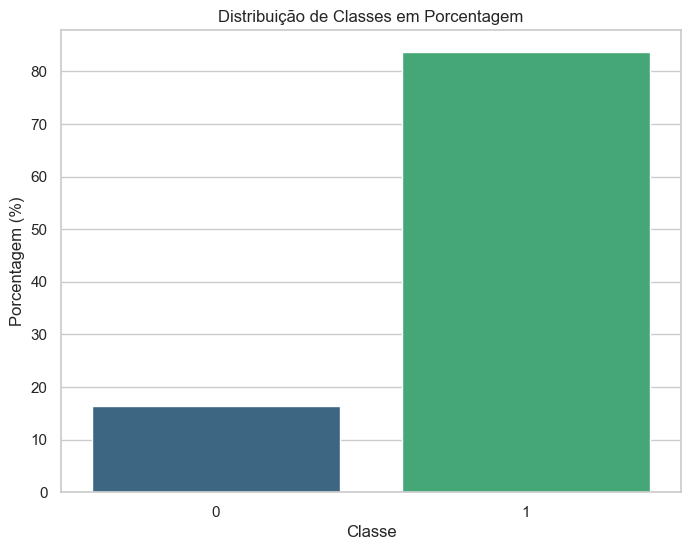

Distribuição de Classes em Porcentagem:
1    83.626374
0    16.373626
Name: Class, dtype: float64


In [84]:
sns.set(style="whitegrid")

# Calcula a porcentagem de cada classe
porcentagens = main_data_total['Class'].value_counts(normalize=True) * 100

# Gráfico de barras para a distribuição de classes em porcentagem
plt.figure(figsize=(8, 6))
sns.barplot(x=porcentagens.index, y=porcentagens, palette='viridis')
plt.xlabel('Classe')
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição de Classes em Porcentagem')
plt.show()


# Calcula a porcentagem de cada classe
porcentagens = main_data_total['Class'].value_counts(normalize=True) * 100

# Imprime as porcentagens
print("Distribuição de Classes em Porcentagem:")
print(porcentagens)

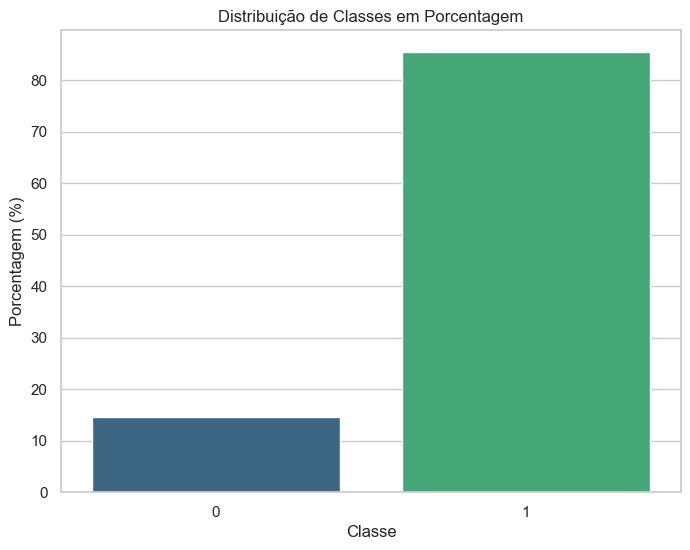

Distribuição de Classes em Porcentagem:
1    85.384615
0    14.615385
Name: Class, dtype: float64


In [85]:
sns.set(style="whitegrid")

# Calcula a porcentagem de cada classe
porcentagens = main_data_useful['Class'].value_counts(normalize=True) * 100

# Gráfico de barras para a distribuição de classes em porcentagem
plt.figure(figsize=(8, 6))
sns.barplot(x=porcentagens.index, y=porcentagens, palette='viridis')
plt.xlabel('Classe')
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição de Classes em Porcentagem')
plt.show()


# Calcula a porcentagem de cada classe
porcentagens = main_data_useful['Class'].value_counts(normalize=True) * 100

# Imprime as porcentagens
print("Distribuição de Classes em Porcentagem:")
print(porcentagens)

### Pré processamento do texto

#### Transformando todas as letras em minúsculas

In [86]:
main_data_total['Text'] = main_data_total['Text'].str.lower()
main_data_useful['Text'] = main_data_useful['Text'].str.lower()

In [87]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Função para remoção de pontuações
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Função para padronizar palavras reduzindo repetições de caracteres
def standardize_words(text):
    return re.sub(r'(.)\1+', r'\1', text)

# Função para realizar stemming com Snowball
def snowball_stemming(text):
    snowball_stemmer = SnowballStemmer("english")
    return ' '.join([snowball_stemmer.stem(word) for word in text.split()])

# Função para pré-processamento completo
def preprocess_text(text, stop_words):
    text = text.lower()
    text = remove_punctuation(text)
    text = standardize_words(text)
    text = snowball_stemming(text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laril\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
main_data_total['Text'] = main_data_total['Text'].apply(lambda x: preprocess_text(x, stop_words))
main_data_useful['Text'] = main_data_useful['Text'].apply(lambda x: preprocess_text(x, stop_words))

In [89]:
from sklearn.model_selection import train_test_split

# Suponha que você já tenha pré-processado seus dados
main_data_total['Text'] = main_data_total['Text'].apply(lambda x: preprocess_text(x, stop_words))
main_data_useful['Text'] = main_data_useful['Text'].apply(lambda x: preprocess_text(x, stop_words))

# Porcentagem do dataset que será utilizado para teste (exemplo com 20%)
test_size = 0.2

# Divisão do dataset total em treino e teste
train_total, test_total = train_test_split(main_data_total, test_size=test_size, random_state=42)

# Divisão do dataset útil em treino e teste
train_useful, test_useful = train_test_split(main_data_useful, test_size=test_size, random_state=42)


#### Undersampling para ajustar a distribuição de classe para 70 - 30

In [90]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.43, random_state=42)
X_train_total, y_train_total = undersample.fit_resample(train_total[['Text']], train_total['Class'])
X_train_useful, y_train_useful = undersample.fit_resample(train_useful[['Text']], train_useful['Class'])


#### Distribuição das classes após o undersampling

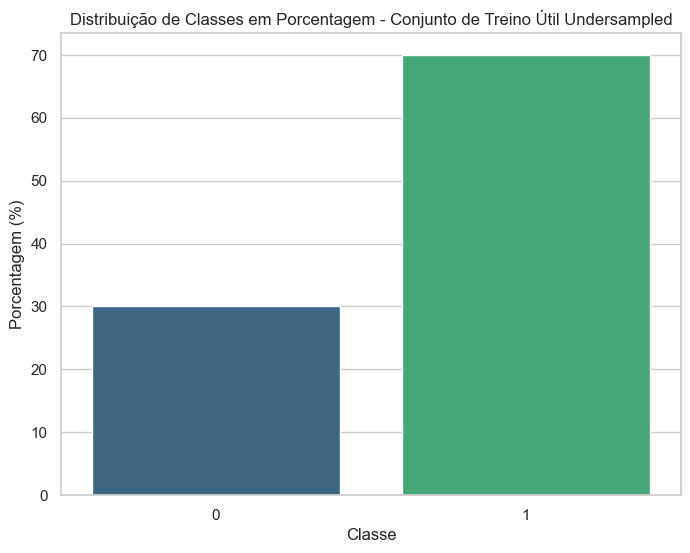

Distribuição de Classes em Porcentagem - Conjunto de Treino Útil Undersampled:
1    69.93007
0    30.06993
Name: Class, dtype: float64


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a porcentagem de cada classe no conjunto de treino útil undersampled
porcentagens_undersampled = y_train_useful.value_counts(normalize=True) * 100

# Gráfico de barras para a distribuição de classes em porcentagem no conjunto de treino útil undersampled
plt.figure(figsize=(8, 6))
sns.barplot(x=porcentagens_undersampled.index, y=porcentagens_undersampled, palette='viridis')
plt.xlabel('Classe')
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição de Classes em Porcentagem - Conjunto de Treino Útil Undersampled')
plt.show()

# Imprime as porcentagens no conjunto de treino útil undersampled
print("Distribuição de Classes em Porcentagem - Conjunto de Treino Útil Undersampled:")
print(porcentagens_undersampled)


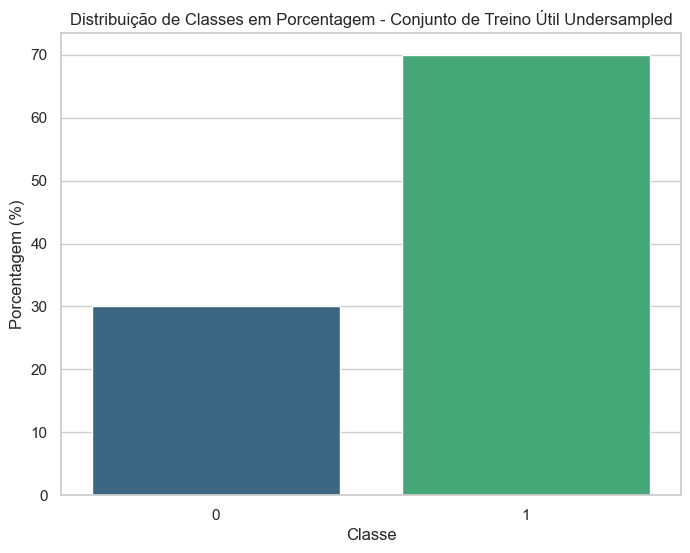

Distribuição de Classes em Porcentagem - Conjunto de Treino Útil Undersampled:
1    69.917669
0    30.082331
Name: Class, dtype: float64


In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a porcentagem de cada classe no conjunto de treino total undersampled
porcentagens_undersampled = y_train_total.value_counts(normalize=True) * 100

# Gráfico de barras para a distribuição de classes em porcentagem no conjunto de treino total undersampled
plt.figure(figsize=(8, 6))
sns.barplot(x=porcentagens_undersampled.index, y=porcentagens_undersampled, palette='viridis')
plt.xlabel('Classe')
plt.ylabel('Porcentagem (%)')
plt.title('Distribuição de Classes em Porcentagem - Conjunto de Treino Útil Undersampled')
plt.show()

# Imprime as porcentagens no conjunto de treino útil undersampled
print("Distribuição de Classes em Porcentagem - Conjunto de Treino Útil Undersampled:")
print(porcentagens_undersampled)


#### Bag of words para representar o texto dos reviews

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

# Treinando o vetorizador no conjunto de treino total
vectorizer_bow = CountVectorizer()
X_train_total_bow = vectorizer_bow.fit_transform(train_total['Text'])

# Aplicando o vetorizador ao conjunto de teste total
X_test_total_bow = vectorizer_bow.transform(test_total['Text'])

# Repetindo o processo para o conjunto útil
X_train_useful_bow = vectorizer_bow.fit_transform(train_useful['Text'])
X_test_useful_bow = vectorizer_bow.transform(test_useful['Text'])

#### Word2Vec para representar o texto dos reviews

In [94]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Função para obter a representação vetorial de uma palavra, verificando sua presença no vocabulário
def get_word_vector(model, word):
    if word in model.wv.key_to_index:
        return model.wv[word]
    else:
        return None  # Retorna None se a palavra não estiver no vocabulário

# Tokenizando os textos
tokenized_train_total = [word_tokenize(text) for text in train_total['Text']]
tokenized_test_total = [word_tokenize(text) for text in test_total['Text']]

tokenized_train_useful = [word_tokenize(text) for text in train_useful['Text']]
tokenized_test_useful = [word_tokenize(text) for text in test_useful['Text']]

# Treinando o modelo Word2Vec no conjunto de treino total
model_w2v_total = Word2Vec(sentences=tokenized_train_total, vector_size=100, window=5, min_count=1, workers=4)

# Obtendo as representações para os conjuntos de treino e teste total
X_train_total_w2v = [[get_word_vector(model_w2v_total, word) for word in text] for text in tokenized_train_total]
X_test_total_w2v = [[get_word_vector(model_w2v_total, word) for word in text] for text in tokenized_test_total]

# Repetindo o processo para o conjunto útil
model_w2v_useful = Word2Vec(sentences=tokenized_train_useful, vector_size=100, window=5, min_count=1, workers=4)
X_train_useful_w2v = [[get_word_vector(model_w2v_useful, word) for word in text] for text in tokenized_train_useful]
X_test_useful_w2v = [[get_word_vector(model_w2v_useful, word) for word in text] for text in tokenized_test_useful]


#### Ngram com bigram e trigram para representação do texto dos reviews

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

# Treinando o vetorizador no conjunto de treino total
vectorizer_ngram = CountVectorizer(ngram_range=(2, 3)) 
X_train_total_ngram = vectorizer_ngram.fit_transform(train_total['Text'])

# Aplicando o vetorizador ao conjunto de teste total
X_test_total_ngram = vectorizer_ngram.transform(test_total['Text'])

# Repetindo o processo para o conjunto útil
X_train_useful_ngram = vectorizer_ngram.fit_transform(train_useful['Text'])
X_test_useful_ngram = vectorizer_ngram.transform(test_useful['Text'])

# Multinomial Naive Bayes

### Multinomial Naibe Bayes com Bag of Words

In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Criando instâncias do classificador Multinomial Naive Bayes
naive_bayes_total_bow = MultinomialNB()
naive_bayes_useful_bow = MultinomialNB()

# Treinamento do modelo no conjunto total
naive_bayes_total_bow.fit(X_train_total_bow, train_total['Class'])

# Fazendo previsões no conjunto de teste total
predictions_total_nb_bow = naive_bayes_total_bow.predict(X_test_total_bow)

# Avaliação do modelo no conjunto total
accuracy_total = accuracy_score(test_total['Class'], predictions_total_nb_bow)
print("Accuracy (Total):", accuracy_total)
print("\nClassification Report (Total):\n", classification_report(test_total['Class'], predictions_total_nb_bow))

# Treinamento do modelo no conjunto útil
naive_bayes_useful_bow.fit(X_train_useful_bow, train_useful['Class'])

# Fazendo previsões no conjunto de teste útil
predictions_useful_nb_bow = naive_bayes_useful_bow.predict(X_test_useful_bow)

# Avaliação do modelo no conjunto útil
accuracy_useful = accuracy_score(test_useful['Class'], predictions_useful_nb_bow)
print("Accuracy (Useful):", accuracy_useful)
print("\nClassification Report (Useful):\n", classification_report(test_useful['Class'], predictions_useful_nb_bow))


Accuracy (Total): 0.8736263736263736

Classification Report (Total):
               precision    recall  f1-score   support

           0       0.78      0.33      0.47       121
           1       0.88      0.98      0.93       607

    accuracy                           0.87       728
   macro avg       0.83      0.66      0.70       728
weighted avg       0.86      0.87      0.85       728

Accuracy (Useful): 0.8804945054945055

Classification Report (Useful):
               precision    recall  f1-score   support

           0       0.71      0.25      0.36       102
           1       0.89      0.98      0.93       626

    accuracy                           0.88       728
   macro avg       0.80      0.61      0.65       728
weighted avg       0.86      0.88      0.85       728



### Multinomial Naibe Bayes com Word2Vec

In [97]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Aplicando o vetorizador CountVectorizer para transformar a representação de Word2Vec em formato compatível com o Naive Bayes
vectorizer_w2v = CountVectorizer()

# Conjunto total
X_train_total_w2v_bow = vectorizer_w2v.fit_transform([' '.join(map(str, text)) for text in X_train_total_w2v])
X_test_total_w2v_bow = vectorizer_w2v.transform([' '.join(map(str, text)) for text in X_test_total_w2v])

# Conjunto útil
X_train_useful_w2v_bow = vectorizer_w2v.fit_transform([' '.join(map(str, text)) for text in X_train_useful_w2v])
X_test_useful_w2v_bow = vectorizer_w2v.transform([' '.join(map(str, text)) for text in X_test_useful_w2v])

# Criando instância do classificador Multinomial Naive Bayes
naive_bayes_total_w2v = MultinomialNB()
naive_bayes_useful_w2v = MultinomialNB()

# Treinamento do modelo nos conjuntos
naive_bayes_total_w2v.fit(X_train_total_w2v_bow, train_total['Class'])
naive_bayes_useful_w2v.fit(X_train_useful_w2v_bow, train_useful['Class'])

# Fazendo previsões nos conjuntos de teste
predictions_total_nb_w2v = naive_bayes_total_w2v.predict(X_test_total_w2v_bow)
predictions_useful_nb_w2v = naive_bayes_useful_w2v.predict(X_test_useful_w2v_bow)

# Avaliação dos modelos nos conjuntos
accuracy_total_w2v = accuracy_score(test_total['Class'], predictions_total_nb_w2v)
accuracy_useful_w2v = accuracy_score(test_useful['Class'], predictions_useful_nb_w2v)

print("Accuracy (Total - Word2Vec):", accuracy_total_w2v)
print("\nClassification Report (Total - Word2Vec):\n", classification_report(test_total['Class'], predictions_total_nb_w2v))

print("Accuracy (Useful - Word2Vec):", accuracy_useful_w2v)
print("\nClassification Report (Useful - Word2Vec):\n", classification_report(test_useful['Class'], predictions_useful_nb_w2v))


Accuracy (Total - Word2Vec): 0.8736263736263736

Classification Report (Total - Word2Vec):
               precision    recall  f1-score   support

           0       0.72      0.40      0.51       121
           1       0.89      0.97      0.93       607

    accuracy                           0.87       728
   macro avg       0.80      0.68      0.72       728
weighted avg       0.86      0.87      0.86       728

Accuracy (Useful - Word2Vec): 0.8763736263736264

Classification Report (Useful - Word2Vec):
               precision    recall  f1-score   support

           0       0.61      0.33      0.43       102
           1       0.90      0.96      0.93       626

    accuracy                           0.88       728
   macro avg       0.75      0.65      0.68       728
weighted avg       0.86      0.88      0.86       728



### Multinomial Naibe Bayes com Ngram

In [98]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Criando instância do classificador Multinomial Naive Bayes
naive_bayes_total_ngram = MultinomialNB()
naive_bayes_useful_ngram = MultinomialNB()

# Treinamento do modelo nos conjuntos
naive_bayes_total_ngram.fit(X_train_total_ngram, train_total['Class'])
naive_bayes_useful_ngram.fit(X_train_useful_ngram, train_useful['Class'])

# Fazendo previsões nos conjuntos de teste
predictions_total_nb_ngram = naive_bayes_total_ngram.predict(X_test_total_ngram)
predictions_useful_nb_ngram = naive_bayes_useful_ngram.predict(X_test_useful_ngram)

# Avaliação dos modelos nos conjuntos
accuracy_total_ngram = accuracy_score(test_total['Class'], predictions_total_nb_ngram)
accuracy_useful_ngram = accuracy_score(test_useful['Class'], predictions_useful_nb_ngram)

print("Accuracy (Total - N-gram):", accuracy_total_ngram)
print("\nClassification Report (Total - N-gram):\n", classification_report(test_total['Class'], predictions_total_nb_ngram))

print("Accuracy (Useful - N-gram):", accuracy_useful_ngram)
print("\nClassification Report (Useful - N-gram):\n", classification_report(test_useful['Class'], predictions_useful_nb_ngram))


Accuracy (Total - N-gram): 0.8626373626373627

Classification Report (Total - N-gram):
               precision    recall  f1-score   support

           0       0.80      0.23      0.36       121
           1       0.87      0.99      0.92       607

    accuracy                           0.86       728
   macro avg       0.83      0.61      0.64       728
weighted avg       0.85      0.86      0.83       728

Accuracy (Useful - N-gram): 0.8708791208791209

Classification Report (Useful - N-gram):
               precision    recall  f1-score   support

           0       0.72      0.13      0.22       102
           1       0.87      0.99      0.93       626

    accuracy                           0.87       728
   macro avg       0.80      0.56      0.57       728
weighted avg       0.85      0.87      0.83       728



# Regressão Logística

#### Regressão logística com Bag of Words

In [99]:
from sklearn.linear_model import LogisticRegression

# Criando instâncias do classificador de Regressão Logística
logistic_regression_total = LogisticRegression()
logistic_regression_useful = LogisticRegression()

# Treinamento do modelo no conjunto total
logistic_regression_total.fit(X_train_total_bow, train_total['Class'])

# Fazendo previsões no conjunto de teste total
predictions_total_logreg_bow = logistic_regression_total.predict(X_test_total_bow)

# Avaliação do modelo no conjunto total
accuracy_total_logreg = accuracy_score(test_total['Class'], predictions_total_logreg_bow)
print("Accuracy (Total - Logistic Regression):", accuracy_total_logreg)
print("\nClassification Report (Total - Logistic Regression):\n", classification_report(test_total['Class'], predictions_total_logreg_bow))

# Treinamento do modelo no conjunto útil
logistic_regression_useful.fit(X_train_useful_bow, train_useful['Class'])

# Fazendo previsões no conjunto de teste útil
predictions_useful_logreg_bow = logistic_regression_useful.predict(X_test_useful_bow)

# Avaliação do modelo no conjunto útil
accuracy_useful_logreg = accuracy_score(test_useful['Class'], predictions_useful_logreg_bow)
print("Accuracy (Useful - Logistic Regression):", accuracy_useful_logreg)
print("\nClassification Report (Useful - Logistic Regression):\n", classification_report(test_useful['Class'], predictions_useful_logreg_bow))


Accuracy (Total - Logistic Regression): 0.8997252747252747

Classification Report (Total - Logistic Regression):
               precision    recall  f1-score   support

           0       0.79      0.55      0.64       121
           1       0.91      0.97      0.94       607

    accuracy                           0.90       728
   macro avg       0.85      0.76      0.79       728
weighted avg       0.89      0.90      0.89       728

Accuracy (Useful - Logistic Regression): 0.9065934065934066

Classification Report (Useful - Logistic Regression):
               precision    recall  f1-score   support

           0       0.72      0.54      0.62       102
           1       0.93      0.97      0.95       626

    accuracy                           0.91       728
   macro avg       0.83      0.75      0.78       728
weighted avg       0.90      0.91      0.90       728



#### Regressão logística com Word2Vec

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Aplicando o vetorizador CountVectorizer para transformar a representação de Word2Vec em formato compatível com a Regressão Logística
vectorizer_w2v = CountVectorizer()

# Conjunto total
X_train_total_w2v_bow = vectorizer_w2v.fit_transform([' '.join(map(str, text)) for text in X_train_total_w2v])
X_test_total_w2v_bow = vectorizer_w2v.transform([' '.join(map(str, text)) for text in X_test_total_w2v])

# Conjunto útil
X_train_useful_w2v_bow = vectorizer_w2v.transform([' '.join(map(str, text)) for text in X_train_useful_w2v])
X_test_useful_w2v_bow = vectorizer_w2v.transform([' '.join(map(str, text)) for text in X_test_useful_w2v])

# Criando instâncias do classificador de Regressão Logística
logistic_regression_total_w2v = LogisticRegression()
logistic_regression_useful_w2v = LogisticRegression()

# Treinamento do modelo nos conjuntos
logistic_regression_total_w2v.fit(X_train_total_w2v_bow, train_total['Class'])
logistic_regression_useful_w2v.fit(X_train_useful_w2v_bow, train_useful['Class'])

# Fazendo previsões nos conjuntos de teste
predictions_total_logreg_w2v = logistic_regression_total_w2v.predict(X_test_total_w2v_bow)
predictions_useful_logreg_w2v = logistic_regression_useful_w2v.predict(X_test_useful_w2v_bow)

# Avaliação dos modelos nos conjuntos
accuracy_total_w2v = accuracy_score(test_total['Class'], predictions_total_logreg_w2v)
accuracy_useful_w2v = accuracy_score(test_useful['Class'], predictions_useful_logreg_w2v)

print("Accuracy (Total - Logistic Regression - Word2Vec):", accuracy_total_w2v)
print("\nClassification Report (Total - Logistic Regression - Word2Vec):\n", classification_report(test_total['Class'], predictions_total_logreg_w2v))

print("Accuracy (Useful - Logistic Regression - Word2Vec):", accuracy_useful_w2v)
print("\nClassification Report (Useful - Logistic Regression - Word2Vec):\n", classification_report(test_useful['Class'], predictions_useful_logreg_w2v))


C:\Users\laril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Total - Logistic Regression - Word2Vec): 0.8983516483516484

Classification Report (Total - Logistic Regression - Word2Vec):
               precision    recall  f1-score   support

           0       0.72      0.63      0.67       121
           1       0.93      0.95      0.94       607

    accuracy                           0.90       728
   macro avg       0.83      0.79      0.81       728
weighted avg       0.89      0.90      0.90       728

Accuracy (Useful - Logistic Regression - Word2Vec): 0.885989010989011

Classification Report (Useful - Logistic Regression - Word2Vec):
               precision    recall  f1-score   support

           0       0.62      0.47      0.54       102
           1       0.92      0.95      0.94       626

    accuracy                           0.89       728
   macro avg       0.77      0.71      0.74       728
weighted avg       0.88      0.89      0.88       728



C:\Users\laril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Regressão logística com Ngram

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Criando instâncias do classificador de Regressão Logística
logistic_regression_total_ngram = LogisticRegression()
logistic_regression_useful_ngram = LogisticRegression()

# Treinamento do modelo nos conjuntos
logistic_regression_total_ngram.fit(X_train_total_ngram, train_total['Class'])
logistic_regression_useful_ngram.fit(X_train_useful_ngram, train_useful['Class'])

# Fazendo previsões nos conjuntos de teste
predictions_total_logreg_ngram = logistic_regression_total_ngram.predict(X_test_total_ngram)
predictions_useful_logreg_ngram = logistic_regression_useful_ngram.predict(X_test_useful_ngram)

# Avaliação dos modelos nos conjuntos
accuracy_total_ngram = accuracy_score(test_total['Class'], predictions_total_logreg_ngram)
accuracy_useful_ngram = accuracy_score(test_useful['Class'], predictions_useful_logreg_ngram)

print("Accuracy (Total - Logistic Regression - N-gram):", accuracy_total_ngram)
print("\nClassification Report (Total - Logistic Regression - N-gram):\n", classification_report(test_total['Class'], predictions_total_logreg_ngram))

print("Accuracy (Useful - Logistic Regression - N-gram):", accuracy_useful_ngram)
print("\nClassification Report (Useful - Logistic Regression - N-gram):\n", classification_report(test_useful['Class'], predictions_useful_logreg_ngram))


Accuracy (Total - Logistic Regression - N-gram): 0.8406593406593407

Classification Report (Total - Logistic Regression - N-gram):
               precision    recall  f1-score   support

           0       0.86      0.05      0.09       121
           1       0.84      1.00      0.91       607

    accuracy                           0.84       728
   macro avg       0.85      0.52      0.50       728
weighted avg       0.84      0.84      0.78       728

Accuracy (Useful - Logistic Regression - N-gram): 0.8598901098901099

Classification Report (Useful - Logistic Regression - N-gram):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.86      1.00      0.92       626

    accuracy                           0.86       728
   macro avg       0.43      0.50      0.46       728
weighted avg       0.74      0.86      0.80       728



C:\Users\laril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: Unde

#### LSTM

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def train_evaluate_lstm(train_text, train_labels, test_text, test_labels):
    top_words = 6000
    tokenizer = Tokenizer(num_words=top_words)
    tokenizer.fit_on_texts(train_text)
    list_tokenized_train = tokenizer.texts_to_sequences(train_text)

    max_review_length = 130
    X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)
    y_train = train_labels

    embedding_vector_length = 32
    model = Sequential()
    model.add(Embedding(top_words + 1, embedding_vector_length, input_length=max_review_length))
    model.add(LSTM(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

    list_tokenized_test = tokenizer.texts_to_sequences(test_text)
    X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
    y_test = test_labels

    predictions_lstm = model.predict(X_test)
    y_pred = (predictions_lstm > 0.5)

    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'Modelo': 'LSTM',
        'Acurácia': accuracy,
        'Precisão': None,
        'Recall': None,
        'F1 Score': f1,
        'AUC-ROC': None,
        'Classification Report': None,
        'Matriz de Confusão': conf_matrix,
        'Predictions': y_pred
    }


# Avaliação e comparação dos modelos 

In [103]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Função para avaliar um modelo e retornar os resultados
def evaluate_model(predictions, true_labels, model_name):
    # Avaliação do modelo
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    auc_roc = roc_auc_score(true_labels, predictions, average='weighted', multi_class='ovr')

    # Relatório de Classificação
    report = classification_report(true_labels, predictions)

    # Matriz de Confusão
    conf_matrix = confusion_matrix(true_labels, predictions)

    return {
        'Modelo': model_name,
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc,
        'Relatório de Classificação': report,
        'Matriz de Confusão': conf_matrix
    }

## Avaliação dos modelos

In [104]:
# Avaliar modelo Naive Bayes no conjunto total com Bag of Words
result_total_nb_bow = evaluate_model(predictions_total_nb_bow, test_total['Class'], 'Naive Bayes (Total) - Bag of Words')

# Avaliar modelo Naive Bayes no conjunto útil com Bag of Words
result_useful_nb_bow = evaluate_model(predictions_useful_nb_bow, test_useful['Class'], 'Naive Bayes (Útil) - Bag of Words')

# Avaliar modelo Naive Bayes no conjunto total com Word2Vec
result_total_nb_w2v = evaluate_model(predictions_total_nb_w2v, test_total['Class'], 'Naive Bayes (Total) - Word2Vec')

# Avaliar modelo Naive Bayes no conjunto útil com Word2Vec
result_useful_nb_w2v = evaluate_model(predictions_useful_nb_w2v, test_useful['Class'], 'Naive Bayes (Útil) - Word2Vec')

# Avaliar modelo Naive Bayes no conjunto total com Ngram
result_total_nb_ngram = evaluate_model(predictions_total_nb_ngram, test_total['Class'], 'Naive Bayes (Total) - Ngram')

# Avaliar modelo Naive Bayes no conjunto útil com Ngram
result_useful_nb_ngram = evaluate_model(predictions_useful_nb_ngram, test_useful['Class'], 'Naive Bayes (Útil) - Ngram')

# Avaliar modelo de Regressão Logística no conjunto total com Bag of Words
result_total_logreg_bow = evaluate_model(predictions_total_logreg_bow, test_total['Class'], 'Regressão Logística (Total) - Bag of Words')

# Avaliar modelo de Regressão Logística no conjunto útil com Bag of Words
result_useful_logreg_bow = evaluate_model(predictions_useful_logreg_bow, test_useful['Class'], 'Regressão Logística (Útil) - Bag of Words')

# Avaliar modelo de Regressão Logística no conjunto total com Word2Vec
result_total_logreg_w2v = evaluate_model(predictions_total_logreg_w2v, test_total['Class'], 'Regressão Logística (Total) - Word2Vec')

# Avaliar modelo de Regressão Logística no conjunto útil com Word2Vec
result_useful_logreg_w2v = evaluate_model(predictions_useful_logreg_w2v, test_useful['Class'], 'Regressão Logística (Útil) - Word2Vec')

# Avaliar modelo de Regressão Logística no conjunto total com Ngram
result_total_logreg_ngram = evaluate_model(predictions_total_logreg_ngram, test_total['Class'], 'Regressão Logística (Total) - Ngram')

# Avaliar modelo de Regressão Logística no conjunto útil com Ngram
result_useful_logreg_ngram = evaluate_model(predictions_useful_logreg_ngram, test_useful['Class'], 'Regressão Logística (Útil) - Ngram')

# Avaliar modelo LSTM no conjunto total
result_total_lstm = train_evaluate_lstm(train_total['Text'], train_total['Class'], test_total['Text'], test_total['Class'])

# Avaliar modelo LSTM no conjunto útil
result_useful_lstm = train_evaluate_lstm(train_useful['Text'], train_useful['Class'], test_useful['Text'], test_useful['Class'])

C:\Users\laril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWa

Epoch 1/3


C:\Users\laril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


37/37 [==============================] - 6s 103ms/step - loss: 0.5026 - accuracy: 0.8252 - val_loss: 0.4497 - val_accuracy: 0.8302
Epoch 2/3
37/37 [==============================] - 3s 87ms/step - loss: 0.4202 - accuracy: 0.8386 - val_loss: 0.4003 - val_accuracy: 0.8302
Epoch 3/3
23/23 [==============================] - 1s 20ms/step
Epoch 1/3


C:\Users\laril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


37/37 [==============================] - 6s 104ms/step - loss: 0.4850 - accuracy: 0.8424 - val_loss: 0.4100 - val_accuracy: 0.8542
Epoch 2/3
37/37 [==============================] - 4s 97ms/step - loss: 0.3978 - accuracy: 0.8519 - val_loss: 0.3742 - val_accuracy: 0.8542
Epoch 3/3
23/23 [==============================] - 1s 21ms/step


#### Impressão dos resultados de cada modelo gerado

In [105]:
# Imprime os resultados do modelo Naive Bayes no conjunto total com Bag of Words
print("Naive Bayes (Total) - Bag of Words:")
print(f"Acurácia: {result_total_nb_bow['Acurácia']}")
print(f"Precisão: {result_total_nb_bow['Precisão']}")
print(f"Recall: {result_total_nb_bow['Recall']}")
print(f"F1 Score: {result_total_nb_bow['F1 Score']}")
print(f"AUC-ROC: {result_total_nb_bow['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_total_nb_bow['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo Naive Bayes no conjunto útil com Bag of Words
print("Naive Bayes (Útil) - Bag of Words:")
print(f"Acurácia: {result_useful_nb_bow['Acurácia']}")
print(f"Precisão: {result_useful_nb_bow['Precisão']}")
print(f"Recall: {result_useful_nb_bow['Recall']}")
print(f"F1 Score: {result_useful_nb_bow['F1 Score']}")
print(f"AUC-ROC: {result_useful_nb_bow['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_useful_nb_bow['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo Naive Bayes no conjunto total com Word2Vec
print("Naive Bayes (Total) - Word2Vec:")
print(f"Acurácia: {result_total_nb_w2v['Acurácia']}")
print(f"Precisão: {result_total_nb_w2v['Precisão']}")
print(f"Recall: {result_total_nb_w2v['Recall']}")
print(f"F1 Score: {result_total_nb_w2v['F1 Score']}")
print(f"AUC-ROC: {result_total_nb_w2v['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_total_nb_w2v['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo Naive Bayes no conjunto útil com Word2Vec
print("Naive Bayes (Útil) - Word2Vec:")
print(f"Acurácia: {result_useful_nb_w2v['Acurácia']}")
print(f"Precisão: {result_useful_nb_w2v['Precisão']}")
print(f"Recall: {result_useful_nb_w2v['Recall']}")
print(f"F1 Score: {result_useful_nb_w2v['F1 Score']}")
print(f"AUC-ROC: {result_useful_nb_w2v['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_useful_nb_w2v['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo Naive Bayes no conjunto total com Ngram
print("Naive Bayes (Total) - Ngram:")
print(f"Acurácia: {result_total_nb_ngram['Acurácia']}")
print(f"Precisão: {result_total_nb_ngram['Precisão']}")
print(f"Recall: {result_total_nb_ngram['Recall']}")
print(f"F1 Score: {result_total_nb_ngram['F1 Score']}")
print(f"AUC-ROC: {result_total_nb_ngram['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_total_nb_ngram['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo Naive Bayes no conjunto útil com Ngram
print("Naive Bayes (Útil) - Ngram:")
print(f"Acurácia: {result_useful_nb_ngram['Acurácia']}")
print(f"Precisão: {result_useful_nb_ngram['Precisão']}")
print(f"Recall: {result_useful_nb_ngram['Recall']}")
print(f"F1 Score: {result_useful_nb_ngram['F1 Score']}")
print(f"AUC-ROC: {result_useful_nb_ngram['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_useful_nb_ngram['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo de Regressão Logística no conjunto total com Bag of Words
print("Regressão Logística (Total) - Bag of Words:")
print(f"Acurácia: {result_total_logreg_bow['Acurácia']}")
print(f"Precisão: {result_total_logreg_bow['Precisão']}")
print(f"Recall: {result_total_logreg_bow['Recall']}")
print(f"F1 Score: {result_total_logreg_bow['F1 Score']}")
print(f"AUC-ROC: {result_total_logreg_bow['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_total_logreg_bow['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo de Regressão Logística no conjunto útil com Bag of Words
print("Regressão Logística (Útil) - Bag of Words:")
print(f"Acurácia: {result_useful_logreg_bow['Acurácia']}")
print(f"Precisão: {result_useful_logreg_bow['Precisão']}")
print(f"Recall: {result_useful_logreg_bow['Recall']}")
print(f"F1 Score: {result_useful_logreg_bow['F1 Score']}")
print(f"AUC-ROC: {result_useful_logreg_bow['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_useful_logreg_bow['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo de Regressão Logística no conjunto total com Word2Vec
print("Regressão Logística (Total) - Word2Vec:")
print(f"Acurácia: {result_total_logreg_w2v['Acurácia']}")
print(f"Precisão: {result_total_logreg_w2v['Precisão']}")
print(f"Recall: {result_total_logreg_w2v['Recall']}")
print(f"F1 Score: {result_total_logreg_w2v['F1 Score']}")
print(f"AUC-ROC: {result_total_logreg_w2v['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_total_logreg_w2v['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo de Regressão Logística no conjunto útil com Word2Vec
print("Regressão Logística (Útil) - Word2Vec:")
print(f"Acurácia: {result_useful_logreg_w2v['Acurácia']}")
print(f"Precisão: {result_useful_logreg_w2v['Precisão']}")
print(f"Recall: {result_useful_logreg_w2v['Recall']}")
print(f"F1 Score: {result_useful_logreg_w2v['F1 Score']}")
print(f"AUC-ROC: {result_useful_logreg_w2v['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_useful_logreg_w2v['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo de Regressão Logística no conjunto total com Ngram
print("Regressão Logística (Total) - Ngram:")
print(f"Acurácia: {result_total_logreg_ngram['Acurácia']}")
print(f"Precisão: {result_total_logreg_ngram['Precisão']}")
print(f"Recall: {result_total_logreg_ngram['Recall']}")
print(f"F1 Score: {result_total_logreg_ngram['F1 Score']}")
print(f"AUC-ROC: {result_total_logreg_ngram['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_total_logreg_ngram['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo de Regressão Logística no conjunto útil com Ngram
print("Regressão Logística (Útil) - Ngram:")
print(f"Acurácia: {result_useful_logreg_ngram['Acurácia']}")
print(f"Precisão: {result_useful_logreg_ngram['Precisão']}")
print(f"Recall: {result_useful_logreg_ngram['Recall']}")
print(f"F1 Score: {result_useful_logreg_ngram['F1 Score']}")
print(f"AUC-ROC: {result_useful_logreg_ngram['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_useful_logreg_ngram['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo LSTM no conjunto total
print("LSTM (Total):")
print(f"Acurácia: {result_total_lstm['Acurácia']}")
print(f"Precisão: {result_total_lstm['Precisão']}")
print(f"Recall: {result_total_lstm['Recall']}")
print(f"F1 Score: {result_total_lstm['F1 Score']}")
print(f"AUC-ROC: {result_total_lstm['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_total_lstm['Matriz de Confusão']}")
print("\n")

# Imprime os resultados do modelo LSTM no conjunto útil
print("LSTM (Útil):")
print(f"Acurácia: {result_useful_lstm['Acurácia']}")
print(f"Precisão: {result_useful_lstm['Precisão']}")
print(f"Recall: {result_useful_lstm['Recall']}")
print(f"F1 Score: {result_useful_lstm['F1 Score']}")
print(f"AUC-ROC: {result_useful_lstm['AUC-ROC']}")
print(f"Matriz de confusão:\n{result_useful_lstm['Matriz de Confusão']}")
print("\n")

Naive Bayes (Total) - Bag of Words:
Acurácia: 0.8736263736263736
Precisão: 0.8643916832725591
Recall: 0.8736263736263736
F1 Score: 0.8513555740788952
AUC-ROC: 0.6562283006794015
Matriz de confusão:
[[ 40  81]
 [ 11 596]]


Naive Bayes (Útil) - Bag of Words:
Acurácia: 0.8804945054945055
Precisão: 0.8644252572824002
Recall: 0.8804945054945055
F1 Score: 0.8543075630202019
AUC-ROC: 0.6145617991605588
Matriz de confusão:
[[ 25  77]
 [ 10 616]]


Naive Bayes (Total) - Word2Vec:
Acurácia: 0.8736263736263736
Precisão: 0.8607833221715399
Recall: 0.8736263736263736
F1 Score: 0.8581678909049875
AUC-ROC: 0.6826963660871104
Matriz de confusão:
[[ 48  73]
 [ 19 588]]


Naive Bayes (Útil) - Word2Vec:
Acurácia: 0.8763736263736264
Precisão: 0.8579441391941393
Recall: 0.8763736263736264
F1 Score: 0.8605679881157245
AUC-ROC: 0.6490947816826411
Matriz de confusão:
[[ 34  68]
 [ 22 604]]


Naive Bayes (Total) - Ngram:
Acurácia: 0.8626373626373627
Precisão: 0.8548641834356121
Recall: 0.8626373626373627
F1 S

In [124]:
acuracia_total_nb_bow = [result_total_nb_bow['Acurácia']]
acuracia_util_nb_bow = [result_useful_nb_bow['Acurácia']]
acuracia_total_nb_w2v = [result_total_nb_w2v['Acurácia']]
acuracia_util_nb_w2v = [result_useful_nb_w2v['Acurácia']]
acuracia_total_nb_ngram = [result_total_nb_ngram['Acurácia']]
acuracia_util_nb_ngram = [result_useful_nb_ngram['Acurácia']]
acuracia_total_logreg_bow = [result_total_logreg_bow['Acurácia']]
acuracia_util_logreg_bow = [result_useful_logreg_bow['Acurácia']]
acuracia_total_logreg_w2v = [result_total_logreg_w2v['Acurácia']]
acuracia_util_logreg_w2v = [result_useful_logreg_w2v['Acurácia']]
acuracia_total_logreg_ngram = [result_total_logreg_ngram['Acurácia']]
acuracia_util_logreg_ngram = [result_useful_logreg_ngram['Acurácia']]
acuracia_total_lstm = [result_total_lstm['Acurácia']]
acuracia_util_lstm = [result_useful_lstm['Acurácia']]

In [125]:
print("Acurácia Total Naive Bayes - Bag of Words:", acuracia_total_nb_bow)
print("Acurácia Útil Naive Bayes - Bag of Words:", acuracia_util_nb_bow)
print("Acurácia Total Naive Bayes - Word2Vec:", acuracia_total_nb_w2v)
print("Acurácia Útil Naive Bayes - Word2Vec:", acuracia_util_nb_w2v)
print("Acurácia Total Naive Bayes - Ngram:", acuracia_total_nb_ngram)
print("Acurácia Útil Naive Bayes - Ngram:", acuracia_util_nb_ngram)
print("Acurácia Total Regressão Logística - Bag of Words:", acuracia_total_logreg_bow)
print("Acurácia Útil Regressão Logística - Bag of Words:", acuracia_util_logreg_bow)
print("Acurácia Total Regressão Logística - Word2Vec:", acuracia_total_logreg_w2v)
print("Acurácia Útil Regressão Logística - Word2Vec:", acuracia_util_logreg_w2v)
print("Acurácia Total Regressão Logística - Ngram:", acuracia_total_logreg_ngram)
print("Acurácia Útil Regressão Logística - Ngram:", acuracia_util_logreg_ngram)
print("Acurácia Total LSTM:", acuracia_total_lstm)
print("Acurácia Útil LSTM:", acuracia_util_lstm)


Acurácia Total Naive Bayes - Bag of Words: [0.8736263736263736]
Acurácia Útil Naive Bayes - Bag of Words: [0.8804945054945055]
Acurácia Total Naive Bayes - Word2Vec: [0.8736263736263736]
Acurácia Útil Naive Bayes - Word2Vec: [0.8763736263736264]
Acurácia Total Naive Bayes - Ngram: [0.8626373626373627]
Acurácia Útil Naive Bayes - Ngram: [0.8708791208791209]
Acurácia Total Regressão Logística - Bag of Words: [0.8997252747252747]
Acurácia Útil Regressão Logística - Bag of Words: [0.9065934065934066]
Acurácia Total Regressão Logística - Word2Vec: [0.8983516483516484]
Acurácia Útil Regressão Logística - Word2Vec: [0.885989010989011]
Acurácia Total Regressão Logística - Ngram: [0.8406593406593407]
Acurácia Útil Regressão Logística - Ngram: [0.8598901098901099]
Acurácia Total LSTM: [0.8722527472527473]
Acurácia Útil LSTM: [0.8873626373626373]


## ANOVA para comparação entre modelos Multinomial Naive Bayes

In [126]:
import numpy as np
from scipy.stats import f_oneway

# Teste ANOVA para todos os modelos Naive Bayes
stat_nb, p_value_nb = f_oneway(acuracia_total_nb_bow, acuracia_util_nb_bow, acuracia_total_nb_w2v, acuracia_util_nb_w2v, acuracia_total_nb_ngram, acuracia_util_nb_ngram)

print(f"Estatística do teste: {stat_nb}, p-Valor: {p_value_nb}")

if p_value_nb < 0.05:
    print("Há diferença estatisticamente significativa entre os modelos Naive Bayes.")
else:
    print("Não há evidência estatística de diferença entre os modelos Naive Bayes.")


Estatística do teste: nan, p-Valor: nan
Não há evidência estatística de diferença entre os modelos Naive Bayes.


## ANOVA para comparação entre modelos de regressão logística

In [127]:
# Teste ANOVA para todos os modelos de Regressão Logística
stat_logreg, p_value_logreg = f_oneway(acuracia_total_logreg_bow, acuracia_util_logreg_bow, acuracia_total_logreg_w2v, acuracia_util_logreg_w2v, acuracia_total_logreg_ngram, acuracia_util_logreg_ngram)

print(f"Estatística do teste: {stat_logreg}, p-Valor: {p_value_logreg}")

if p_value_logreg < 0.05:
    print("Há diferença estatisticamente significativa entre os modelos de regressão logística.")
else:
    print("Não há evidência estatística de diferença entre os modelos de regressão logística.")


Estatística do teste: nan, p-Valor: nan
Não há evidência estatística de diferença entre os modelos de regressão logística.


In [128]:
# Teste t pareado para os modelos LSTM
stat_lstm, p_value_lstm = ttest_rel(acuracia_total_lstm, acuracia_util_lstm)

print(f"Estatística do teste: {stat_lstm}, p-Valor: {p_value_lstm}")

if p_value_lstm < 0.05:
    print("Há diferença estatisticamente significativa entre os modelos LSTM.")
else:
    print("Não há evidência estatística de diferença entre os modelos LSTM.")


Estatística do teste: nan, p-Valor: nan
Não há evidência estatística de diferença entre os modelos LSTM.


C:\Users\laril\AppData\Local\Temp\ipykernel_11308\4056054745.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat_lstm, p_value_lstm = ttest_rel(acuracia_total_lstm, acuracia_util_lstm)


## ANOVA para comparação entre um modelo de cada tipo escolhido

- Foram escolhidos os modelos de melhor acurácia e F1 Score (um multinomial naive bayes, um de regressão logística e um LSTM)

In [129]:
# Teste ANOVA para os 3 modelos escolhidos
stat, p_value = f_oneway(acuracia_util_logreg_bow, acuracia_total_nb_w2v, acuracia_util_lstm)

print(f"Estatística do teste: {stat}, p-Valor: {p_value}")

if p_value < 0.05:
    print("Há diferença estatisticamente significativa entre os modelos de regressão logística.")
else:
    print("Não há evidência estatística de diferença entre os modelos de regressão logística.")

Estatística do teste: nan, p-Valor: nan
Não há evidência estatística de diferença entre os modelos de regressão logística.


# Considerando que não houve diferença estatística entre os modelos escolhe-se o modelo de regressão logística com o conjunto de reviews úteis, utilizando Bag of Words para representação do texto. Esse modelo foi escolhido como melhor para esse caso, entre os modelos testados, por suas medidas de acurácia, F1 score, matriz de dispersão e tempo de processamento.